In [5]:
from matplotlib import pyplot as ply
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido

In [7]:
#data is scraped from immoscout24 on 30.12.2022. 
df=pd.read_excel('C:\\Users\\Sew-th\Desktop\\Python Datasets\\immoscout24.xlsx')
df=df[df.Price<=10000]
df2=df[df.Price<=2000]
df2.describe()

,Rooms,Area,Price
count,1052.000000,1052.000000,1052.000000
mean,2.450570,58.944867,1547.535171
std,0.889162,20.170887,299.315492
min,1.000000,20.000000,250.000000
25%,2.000000,45.000000,1384.500000
50%,2.500000,60.000000,1570.000000
75%,3.000000,73.000000,1790.000000
max,5.500000,135.000000,2000.000000


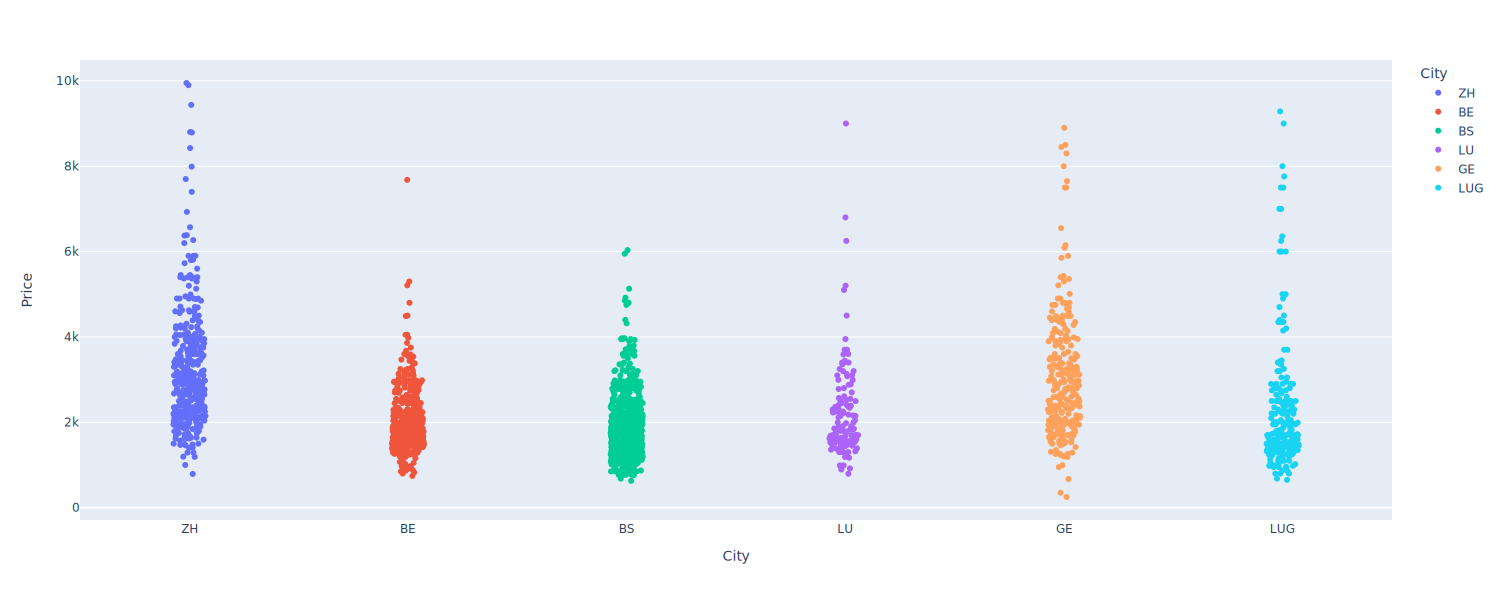

In [27]:
fig=px.strip(df,x= 'City',y= 'Price', color='City',width=1500, height=600)
fig.show('svg')


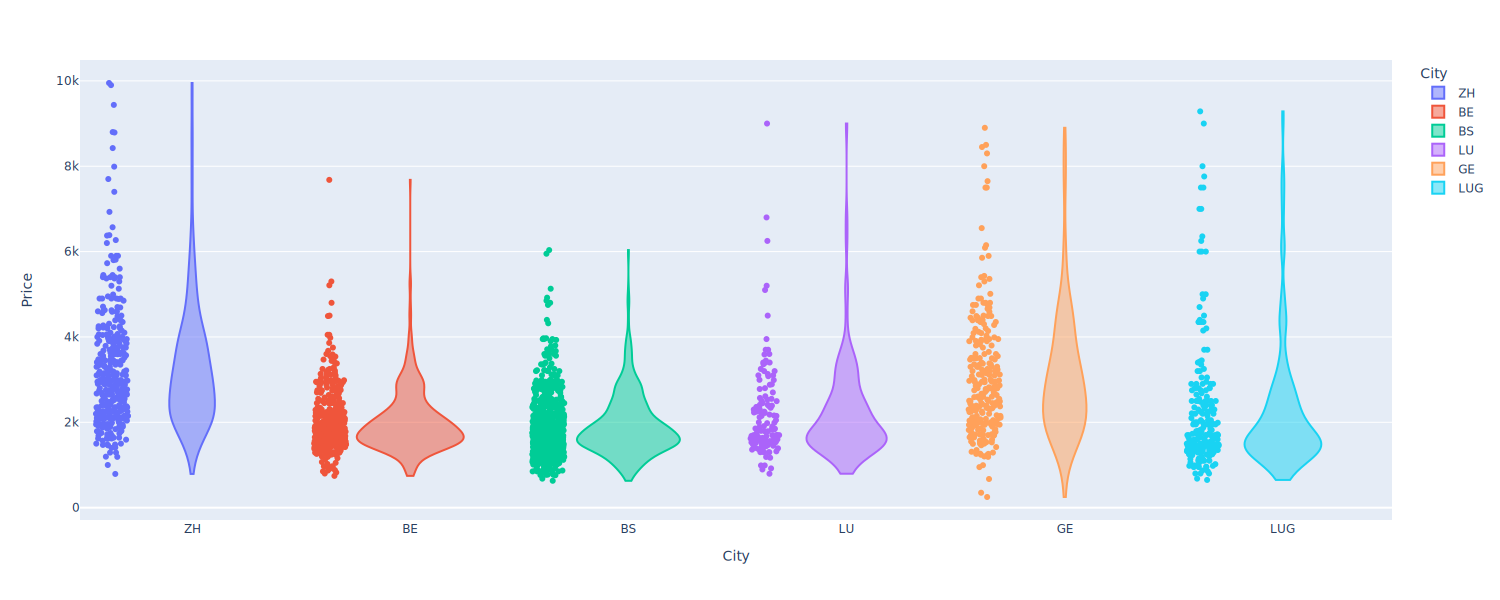

In [26]:
fig=px.violin(df,x= 'City',y= 'Price', color='City', points='all',width=1500, height=600 ).update_traces(spanmode='hard')
fig.show('svg')

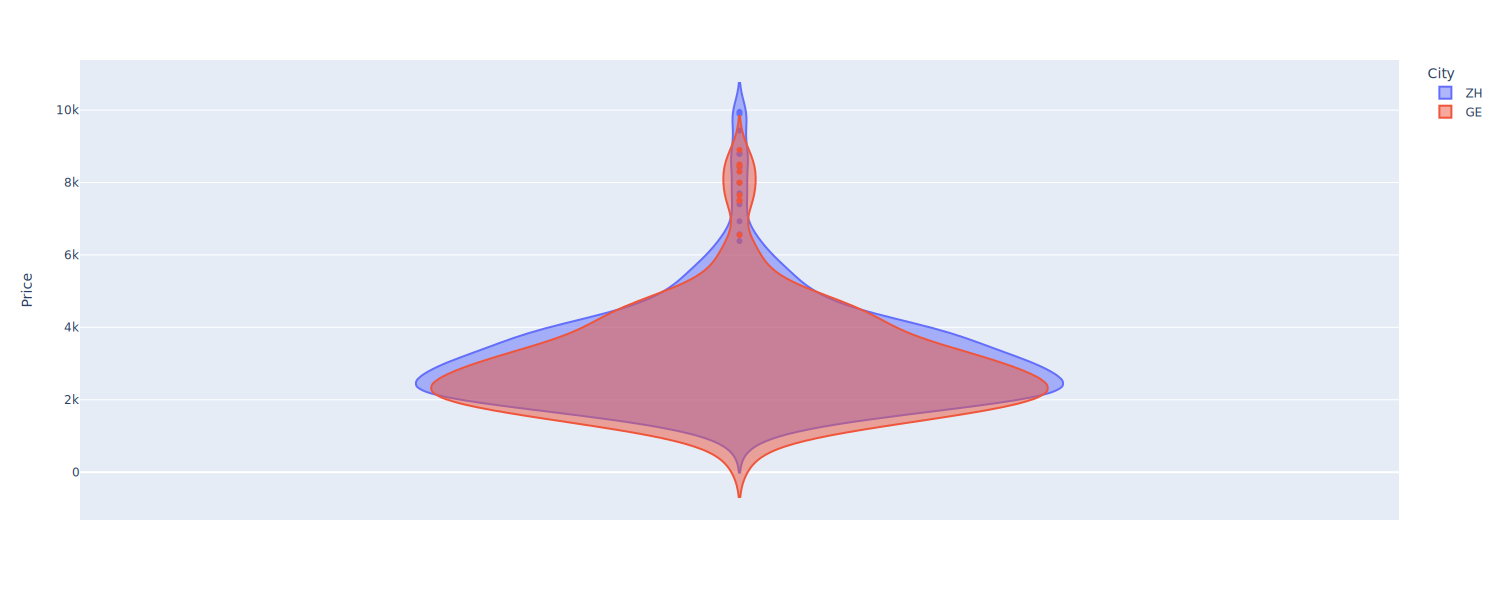

In [25]:
#using loc and isin to access two cities
fig=px.violin(df.loc[df['City'].isin(['ZH','GE'])],y= 'Price', color='City', violinmode='overlay',width=1500, height=600)
fig.show('svg')

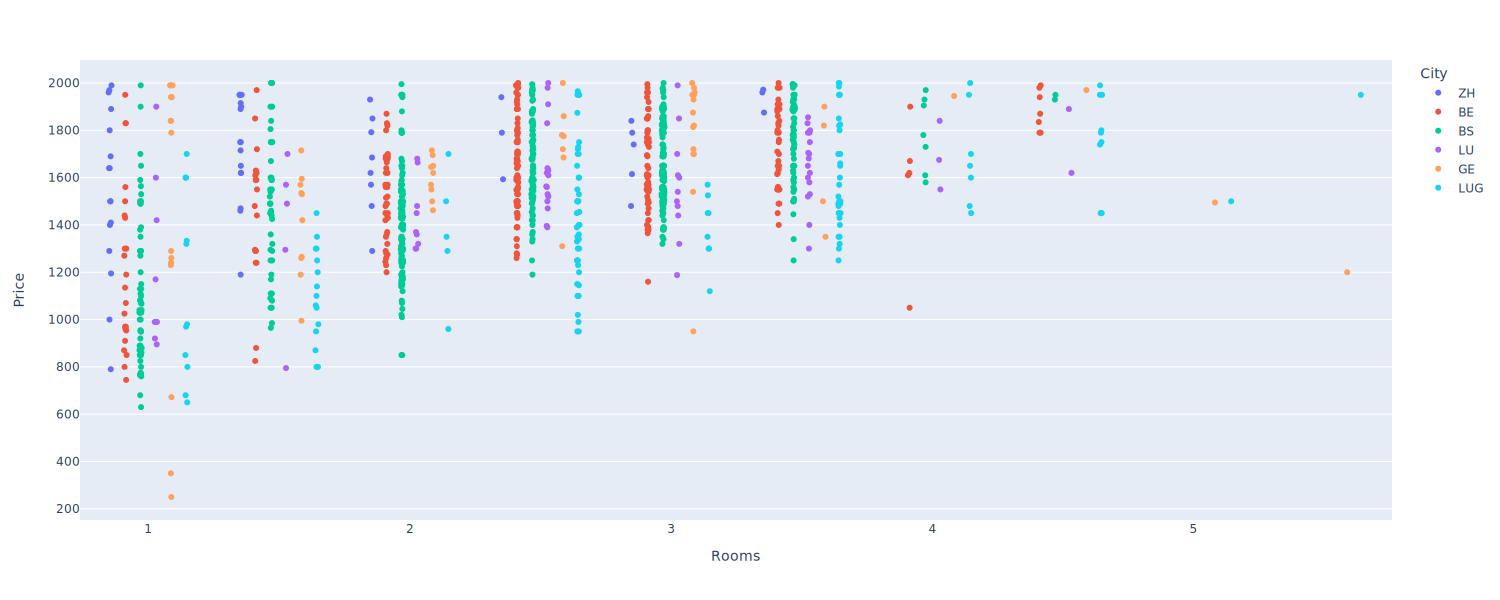

In [24]:
fig=px.strip(df2, x='Rooms', y='Price', color='City',width=1500, height=600)
fig.show('svg')

<Axes: >

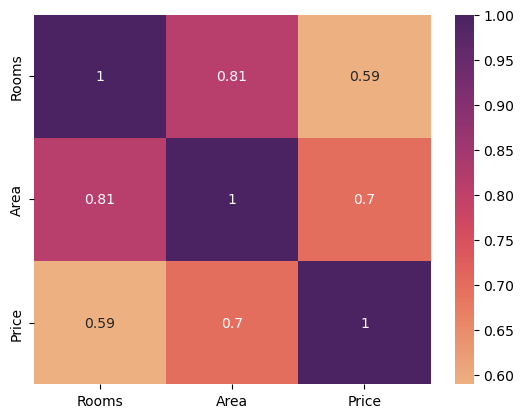

In [9]:
sns.heatmap(df2[df2.City=='LUG'].corr(numeric_only=True), annot=True, cmap='flare')

In [10]:
fig= px.scatter(df2, 'Area', 'Price', facet_col='City', animation_frame='Rooms', animation_group='Price',range_x=[20,200], range_y=[0,2000])
fig.show('svg')

In [21]:
#feature engineering
df['PricePerRoom']=df['Price']/df['Rooms']
df2=df[df.Price<=2000]

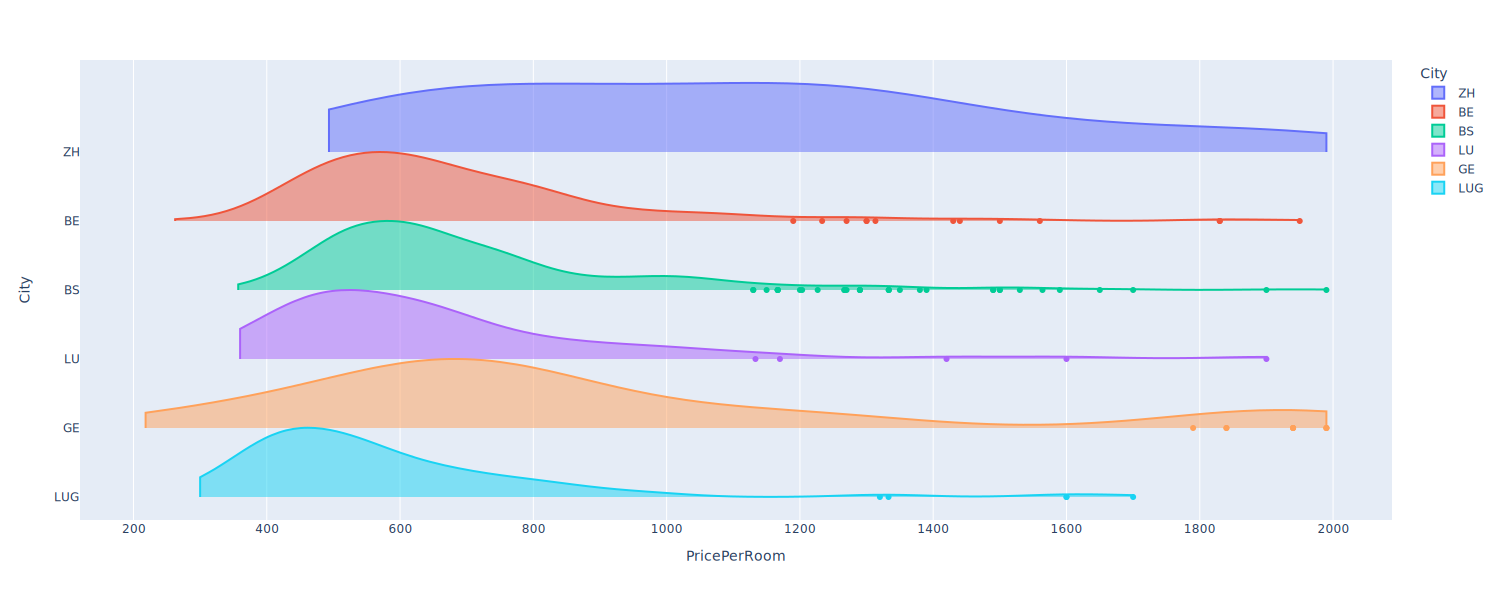

In [23]:
fig=px.violin(df2, x='PricePerRoom', y='City', orientation='h', color='City',width=1500, height=600).update_traces(side="positive", width=2, spanmode='hard')
fig.show('svg')

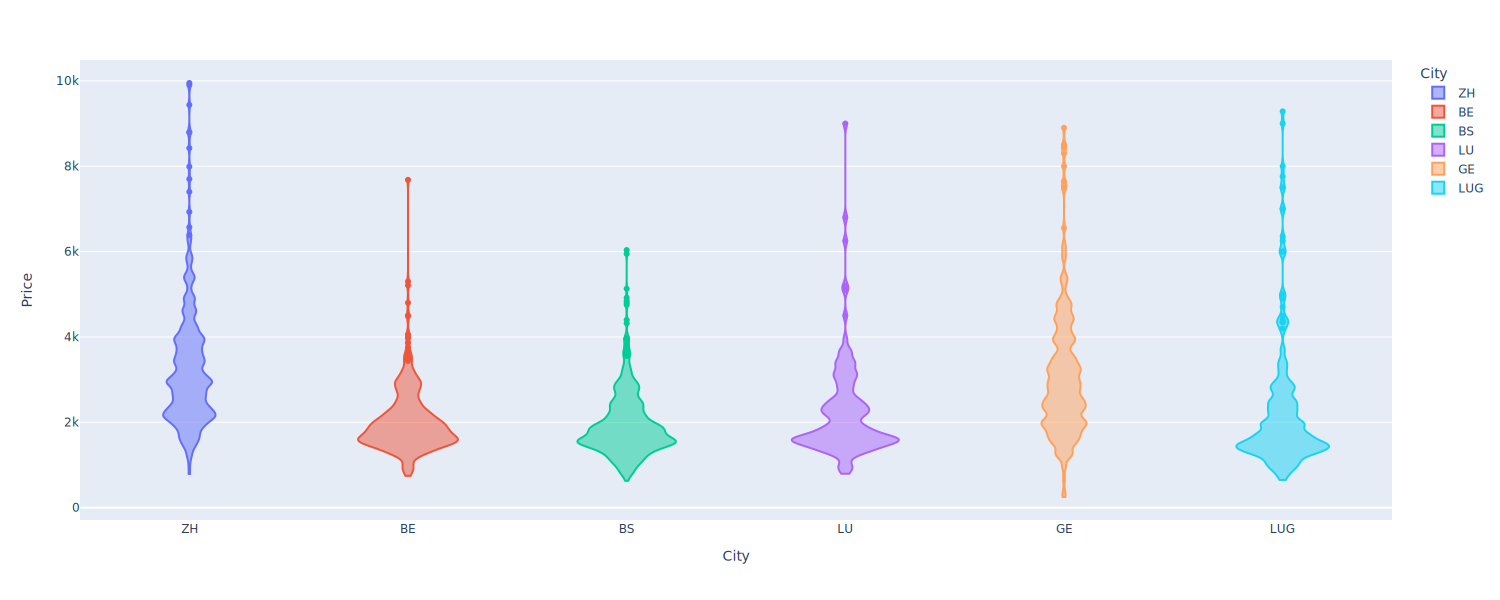

In [19]:
fig=px.violin(df, x='City', y='Price', orientation='v', color='City',width=1500, height=600).update_traces(spanmode='hard',bandwidth=100)
fig.show('svg')

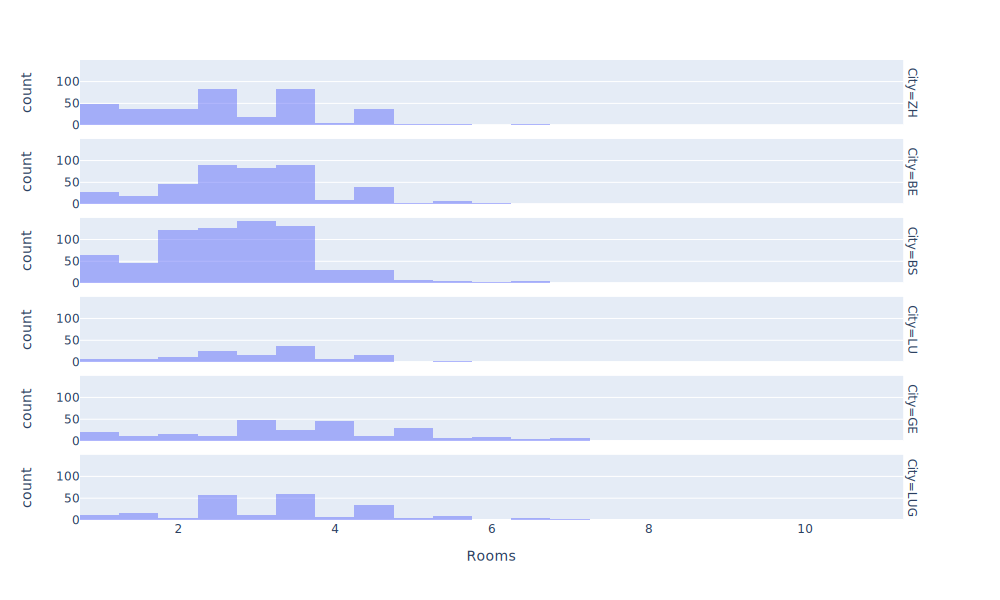

In [14]:
fig=px.histogram(df, x='Rooms', facet_row='City', barmode='overlay',width=1000, height=600)
fig.show('svg')

In [16]:
df['PricePerArea']=df['Price']/df['Area']
df2=df[df.Price<=2000]
df2

,City,Rooms,Area,Price,PricePerArea
4,ZH,1.5,34,1650.0,48.529412
7,ZH,1.5,23,1460.0,63.478261
12,ZH,3.0,61,1740.0,28.524590
13,ZH,1.5,39,1915.0,49.102564
21,ZH,1.0,32,1690.0,52.812500
...,...,...,...,...,...
2111,LUG,3.5,80,2000.0,25.000000
2114,LUG,2.5,75,1390.0,18.533333
2115,LUG,3.5,95,1520.0,16.000000
2116,LUG,3.5,95,1500.0,15.789474


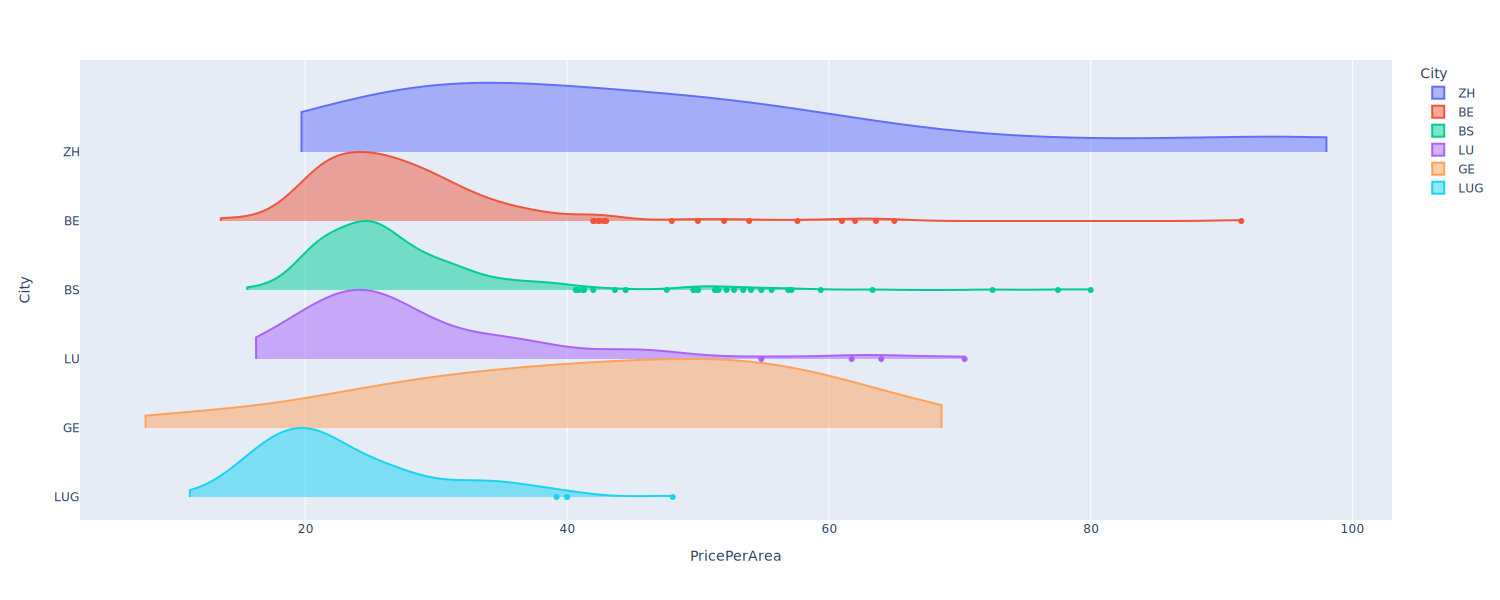

In [18]:
fig=px.violin(df2, x='PricePerArea', y='City', orientation='h', color='City',width=1500, height=600).update_traces(side="positive", width=2, spanmode='hard')
fig.show('svg')